<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part_2_multioutput_svr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=a2cd967f0fecd042e54bf78a2bf333b19228822cc49b2ad66128d1a0d4c6d03e
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [4]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [5]:
""" multiplier is a list of 1000 random number in (1,3) """

import random
multiplier = []
for i in range(1000):
    multiplier.append(random.uniform(1,3))
    


In [6]:
""" beta is (1,3) times of gamma values """
# Multiplying two lists 
beta = [] 
for i in range(1000): 
    beta.append(gamma[i] * multiplier[i]) 

In [7]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [8]:
Gamma = pd.DataFrame(gamma)

In [9]:
beta_list = []
for i in range(1000):
  beta_list.append(beta[i])  
Beta = pd.DataFrame(beta_list)    

In [10]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [11]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 1 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 items and each item itself list of 1 values 
    and S_next_list, I_next_list, R_next_list are list of S, I, R respectively for (day +1) value for each of 1 days for each of 1000 rows   """
S_list = []
S_next_list = []
I_list = []
I_next_list = []
R_list = []
R_next_list = []
for i in range(1000):
  p = sample(range(0, 99), 1)
  S_list.append(S_value[p].iloc[i].to_list())
  S_next_list.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_next_list.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_next_list.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [12]:
""" merging 1000 lists each of 1 items into a single list of 1000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susnext_list = []
for i in range(1000):
 susnext_list = susnext_list+S_next_list[i]

infectednext_list = []
for i in range(1000):
 infectednext_list = infectednext_list+I_next_list[i]  

recovnext_list = []
for i in range(1000):
 recovnext_list = recovnext_list+R_next_list[i]


In [13]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susnext_list)
df_5 = pd.DataFrame(infectednext_list)
df_6 = pd.DataFrame(recovnext_list)


In [14]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta,Gamma], axis=1)
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6,7
0,997.779112,1.237041e+00,0.983848,997.747537,1.243155e+00,1.009307,0.025518,0.020531
1,209.118826,4.531270e+01,745.568471,206.083824,4.137777e+01,752.538402,0.337487,0.160897
2,72.204688,-2.418593e-10,927.795312,72.204688,-1.828724e-10,927.795312,1.983281,0.700382
3,980.121441,3.242808e+00,16.635751,979.185995,3.345630e+00,17.468376,0.289881,0.252768
4,65.513947,1.801487e-06,934.486051,65.513947,1.017387e-06,934.486052,2.063455,0.707754
...,...,...,...,...,...,...,...,...
995,132.556049,1.431881e-01,867.300763,132.542235,1.122513e-01,867.345513,0.819975,0.352106
996,645.030266,1.902470e+02,164.722726,613.711017,2.028244e+02,183.464562,0.253171,0.095331
997,231.841310,5.571947e+01,712.439215,228.432380,5.190360e+01,719.664021,0.275367,0.134307
998,707.535099,1.326519e+02,159.813037,688.585921,1.390246e+02,172.389485,0.199823,0.092572


In [15]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6,7]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [16]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6,7
0,0.998700,4.408754e-03,0.001046,0.998675,4.362556e-03,0.001069,0.008449,0.020299
1,0.159199,1.614923e-01,0.792788,0.155969,1.452054e-01,0.800199,0.114080,0.160916
2,0.013458,8.205425e-13,0.986556,0.013458,1.302318e-12,0.986556,0.671334,0.701362
3,0.979904,1.155721e-02,0.017689,0.978917,1.174069e-02,0.018571,0.097961,0.252950
4,0.006336,6.422095e-09,0.993670,0.006336,3.572220e-09,0.993670,0.698480,0.708747
...,...,...,...,...,...,...,...,...
995,0.077700,5.103153e-04,0.922230,0.077686,3.939190e-04,0.922277,0.277447,0.352465
996,0.623211,6.780311e-01,0.175155,0.589878,7.117638e-01,0.195081,0.085531,0.095232
997,0.183386,1.985815e-01,0.757561,0.179759,1.821433e-01,0.765242,0.093046,0.134278
998,0.689746,4.727648e-01,0.169935,0.669581,4.878735e-01,0.183304,0.067467,0.092468


In [17]:
X = data_scaled[[0,1,2,3,4,5]]
y = data_scaled[[6,7]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.model_selection import train_test_split
X_dev, X_test_1, y_dev, y_test_1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [35]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe_svr = Pipeline([('scl', StandardScaler()),
        ('reg', MultiOutputRegressor(SVR()))])

grid_param_svr = {
    'reg__estimator__C': [0.1,1,10]
}

gs_svr = (GridSearchCV(estimator=pipe_svr, 
                      param_grid=grid_param_svr, 
                      cv=2,
                      scoring = 'neg_mean_squared_error',
                      n_jobs = -1))

gs_svr = gs_svr.fit(X_train,y_train)
gs_svr.best_estimator_    

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), 
('reg', MultiOutputRegressor(estimator=SVR(C=10, cache_size=200,
 coef0=0.0, degree=3, epsilon=0.1, gamma='auto', kernel='rbf', max_iter=-1,    
 shrinking=True, tol=0.001, verbose=False), n_jobs=1))])

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 MultiOutputRegressor(estimator=SVR(C=10, cache_size=200,
                                                    coef0=0.0, degree=3,
                                                    epsilon=0.1, gamma='auto',
                                                    kernel='rbf', max_iter=-1,
                                                    shrinking=True, tol=0.001,
                                                    verbose=False),
                                      n_jobs=1))],
         verbose=False)

In [52]:
p = gs_svr.predict(X_test)
q = gs_svr.predict(X_train)

In [53]:
from sklearn.metrics import mean_absolute_error

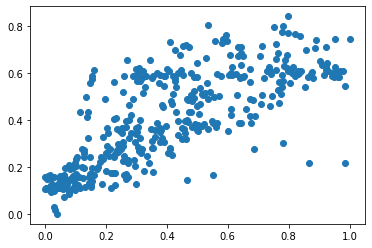

In [54]:
plt.scatter(y_test,p)

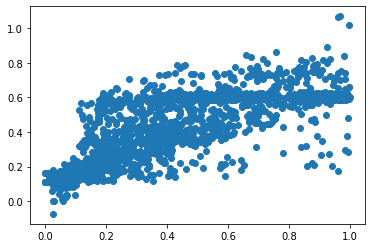

In [55]:
plt.scatter(y_train,q)

In [56]:
rmse_train = np.sqrt(mean_squared_error(y_train,q))
r2_train = r2_score(y_train, q)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, p))
r2_test = r2_score(y_test, p)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.17921602033193285
R2 score of training set is 0.5437867364289329


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.17438064298958234
R2 score of test set is 0.5636377556705974
